# Лабораторная работа №1. Бибиков Павел ИУ5-22М

**Цель лабораторной работы:** изучение различных методов визуализация данных и создание истории на основе данных
**Краткое описание.** Построение графиков, помогающих понять структуру данных, и их интерпретация
**Задание:**
1. Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.

2. Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
    * История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
    * На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
    * Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
    * Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
    * История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
3. Сформировать отчет и разместить его в своем репозитории на github.

### Выбор набора данных (датасета)
"Student Performance Data Set" (Данные об успеваемости студентов) - содержит информацию о баллах студентов по разным предметам, а также демографические и социальные факторы.

## Создание "истории о данных" в Jupyter Notebook

### Шаг 0: Загрузка данных и первичный осмотр

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Настройки для лучшего отображения графиков
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Загрузка данных
try:
    df = pd.read_csv('StudentsPerformance.csv')
except FileNotFoundError:
    # Для примера создадим DataFrame с похожей структурой, если файл не найден
    data_placeholder = {
        'gender': ['female', 'male', 'female', 'male', 'female'] * 200,
        'race/ethnicity': ['group B', 'group C', 'group A', 'group D', 'group E'] * 200,
        'parental level of education': ["bachelor's degree", "some college", "master's degree", "associate's degree", "high school"] * 200,
        'lunch': ['standard', 'free/reduced', 'standard', 'free/reduced', 'standard'] * 200,
        'test preparation course': ['none', 'completed', 'none', 'completed', 'none'] * 200,
        'math score': np.random.randint(0, 101, 1000),
        'reading score': np.random.randint(0, 101, 1000),
        'writing score': np.random.randint(0, 101, 1000)
    }
    df = pd.DataFrame(data_placeholder)
    print("Создан демонстрационный DataFrame.")

In [4]:
print("Первые 5 строк данных:")
print(df.head())

Первые 5 строк данных:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [5]:
print("\nИнформация о данных:")
df.info()


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
print("\nОписательная статистика числовых признаков:")
print(df.describe())


Описательная статистика числовых признаков:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [7]:
print("\nПроверка на наличие пропущенных значений:")
print(df.isnull().sum())


Проверка на наличие пропущенных значений:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [8]:
# Преобразуем названия колонок для удобства (уберем пробелы и спецсимволы)
df.columns = df.columns.str.replace(' ', '_') \
                       .str.replace('/', '_') \
                       .str.replace(r'[\(\)]', '', regex=True) # убираем скобки
print("\nНовые названия колонок:")
print(df.columns)


Новые названия колонок:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


### Шаг 1: Распределение баллов по математике

**Обоснование выбора графика (Data-to-Viz):**
Мы хотим изучить распределение одной числовой переменной (math_score). Согласно методологии data-to-viz.com, для этой задачи хорошо подходят гистограмма или график плотности (density plot). Гистограмма покажет частоту попадания значений в определенные интервалы.
**"Неудачный" график (пример):** Гистограмма со слишком большим или слишком маленьким количеством бинов (корзин).

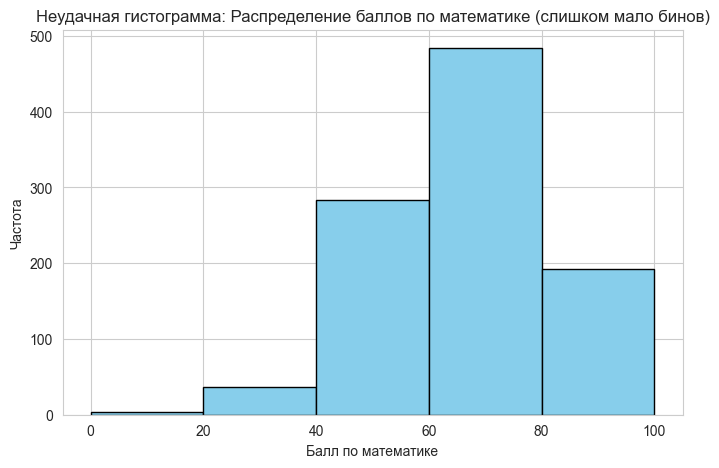

In [9]:
# "Неудачный" вариант: слишком мало бинов
plt.figure(figsize=(8,5))
plt.hist(df['math_score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Неудачная гистограмма: Распределение баллов по математике (слишком мало бинов)')
plt.xlabel('Балл по математике')
plt.ylabel('Частота')
plt.show()
# Такой график слишком сильно обобщает данные, теряются детали распределения.

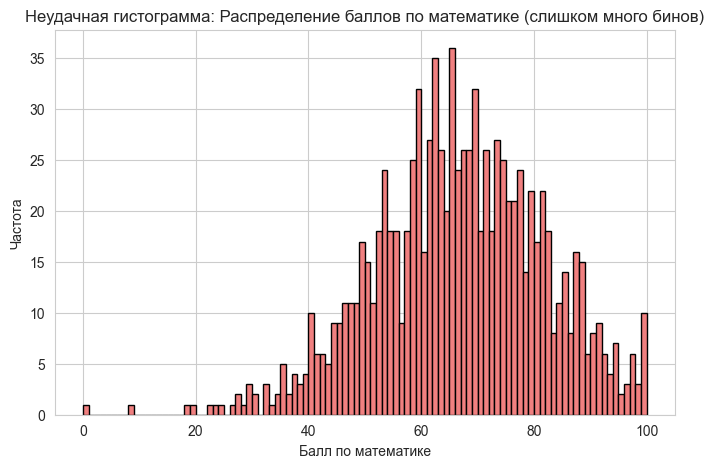

In [10]:
# "Неудачный" вариант: слишком много бинов
plt.figure(figsize=(8,5))
plt.hist(df['math_score'], bins=100, color='lightcoral', edgecolor='black')
plt.title('Неудачная гистограмма: Распределение баллов по математике (слишком много бинов)')
plt.xlabel('Балл по математике')
plt.ylabel('Частота')
plt.show()
# Такой график слишком детализирован, "шумный", сложно увидеть общую картину.

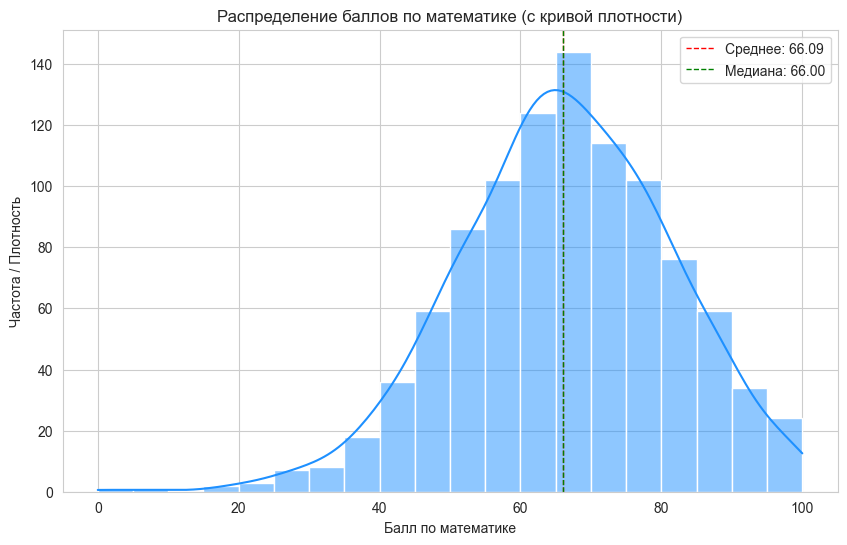

In [11]:
# "Удачный" график:
plt.figure(figsize=(10,6))
sns.histplot(df['math_score'], kde=True, bins=20, color='dodgerblue') # kde=True добавит график плотности
plt.title('Распределение баллов по математике (с кривой плотности)')
plt.xlabel('Балл по математике')
plt.ylabel('Частота / Плотность')
plt.axvline(df['math_score'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Среднее: {df['math_score'].mean():.2f}")
plt.axvline(df['math_score'].median(), color='green', linestyle='dashed', linewidth=1, label=f"Медиана: {df['math_score'].median():.2f}")
plt.legend()
plt.show()

Распределение баллов по математике близко к нормальному. Большинство студентов набрали от 45 до 90 баллов. Средний балл составляет 66,09, медианный - 66. Есть небольшое количество студентов с очень низкими/высокими баллами. Кривая плотности помогает сгладить гистограмму и лучше увидеть форму распределения.

### Шаг 2: Сравнение среднего балла по разным предметам в зависимости от прохождения курса подготовки к тесту

**Обоснование выбора графика (Data-to-Viz):**
Мы хотим сравнить значения числовой переменной (средний балл) для разных категорий (пройден/не пройден курс подготовки) по трем группам (математика, чтение, письмо). Для сравнения значений между группами хорошо подходит сгруппированная столбчатая диаграмма (grouped bar chart).

**"Неудачный" график (пример):** Попытка отобразить все на одной простой столбчатой диаграмме без группировки, что сделает сравнение сложным. Или использование круговой диаграммы, которая не подходит для сравнения средних значений.

In [12]:
# Подготовка данных для графика
prep_effect = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
prep_effect_melted = prep_effect.melt(id_vars='test_preparation_course', var_name='subject', value_name='average_score')

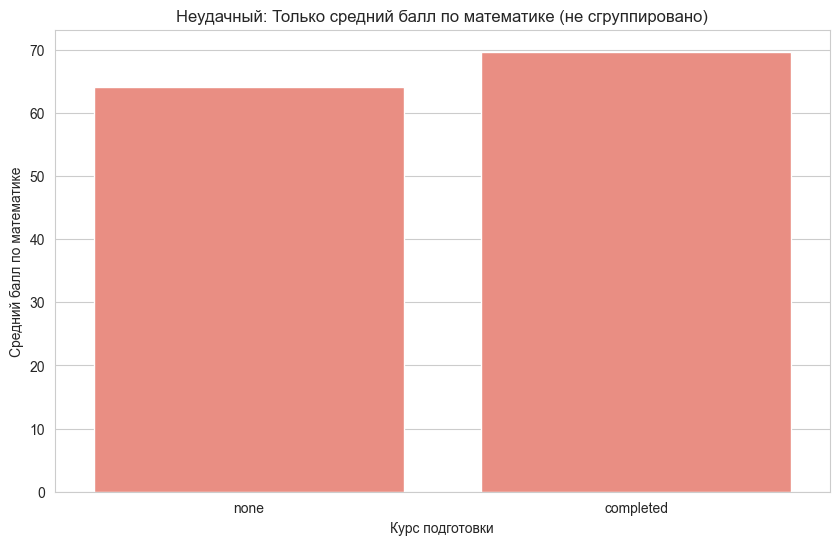

In [13]:
# "Неудачный" вариант: (сложно придумать совсем неудачный сгруппированный, но можно сделать его менее читаемым)
# Например, если бы у нас было много категорий подготовки или много предметов
# Попробуем построить простой barplot без группировки, что не ответит на наш вопрос.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='test_preparation_course', y='math_score', errorbar=None, color='salmon') # ci=None убирает доверительные интервалы для упрощения
plt.title('Неудачный: Только средний балл по математике (не сгруппировано)')
plt.xlabel('Курс подготовки')
plt.ylabel('Средний балл по математике')
plt.show()
# Этот график показывает только математику и не позволяет легко сравнить влияние курса на все предметы одновременно.

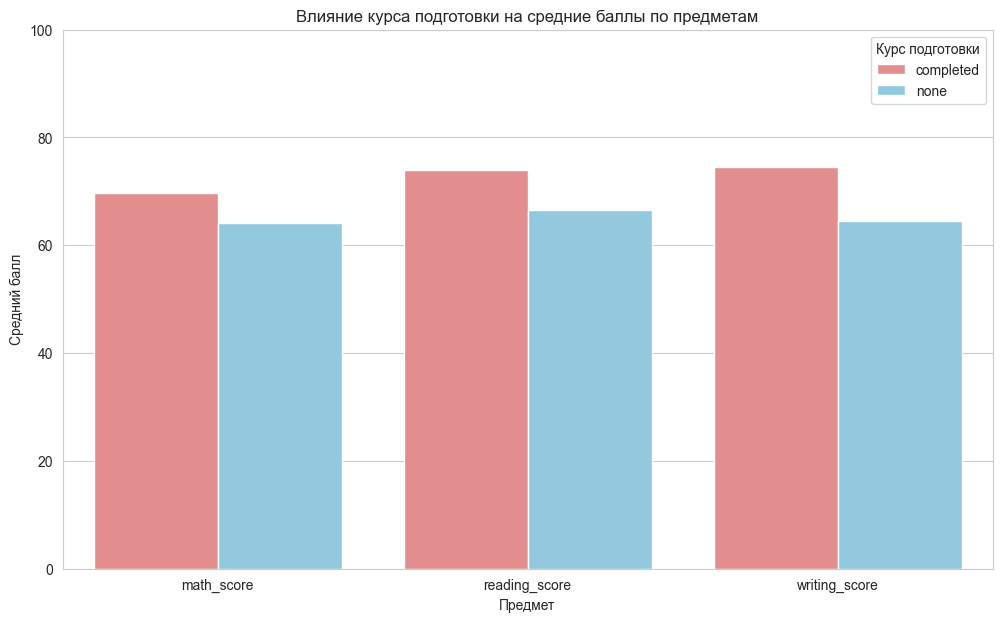

In [14]:
# "Удачный" график:
plt.figure(figsize=(12, 7))
sns.barplot(x='subject', y='average_score', hue='test_preparation_course', data=prep_effect_melted, palette={'none':'skyblue', 'completed':'lightcoral'})
plt.title('Влияние курса подготовки на средние баллы по предметам')
plt.xlabel('Предмет')
plt.ylabel('Средний балл')
plt.legend(title='Курс подготовки')
plt.ylim(0, 100) # Устанавливаем предел по Y для наглядности
plt.show()


Студенты, прошедшие курс подготовки к тестам, в среднем показывают более высокие результаты по всем трем предметам: математике, чтению и письму. Наибольший прирост от курса подготовки наблюдается по правописанию, а наименьший — по математике. Это подчеркивает важность подготовки.

### Шаг 3: Зависимость между баллами по чтению и письму

**Обоснование выбора графика (Data-to-Viz):**
Мы хотим изучить взаимосвязь (корреляцию) между двумя числовыми переменными (reading_score и writing_score). Для этого идеально подходит диаграмма рассеяния (scatter plot).

**"Неудачный" график (пример):** Диаграмма рассеяния без прозрачности (alpha), если точек очень много, они будут сливаться в "облако". Или использование линейного графика, который не подходит для показа корреляции между отдельными точками.

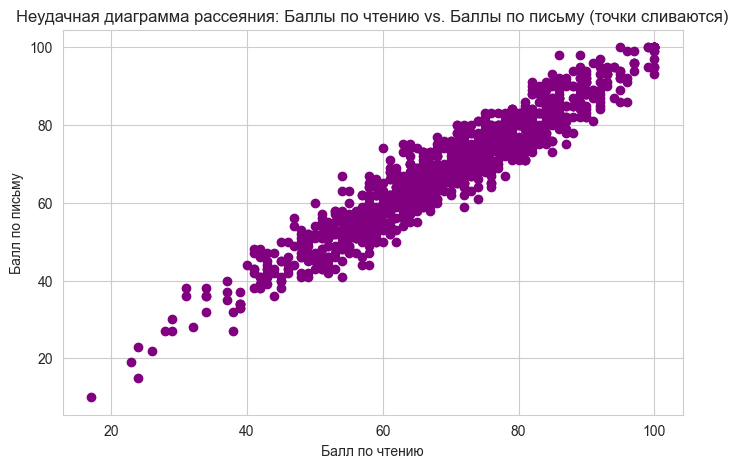

In [15]:
# "Неудачный" вариант: точки сливаются, нет разделения по категориям (если нужно)
plt.figure(figsize=(8,5))
plt.scatter(df['reading_score'], df['writing_score'], color='purple')
plt.title('Неудачная диаграмма рассеяния: Баллы по чтению vs. Баллы по письму (точки сливаются)')
plt.xlabel('Балл по чтению')
plt.ylabel('Балл по письму')
plt.show()
# При большом количестве точек такой график становится неинформативным "облаком".

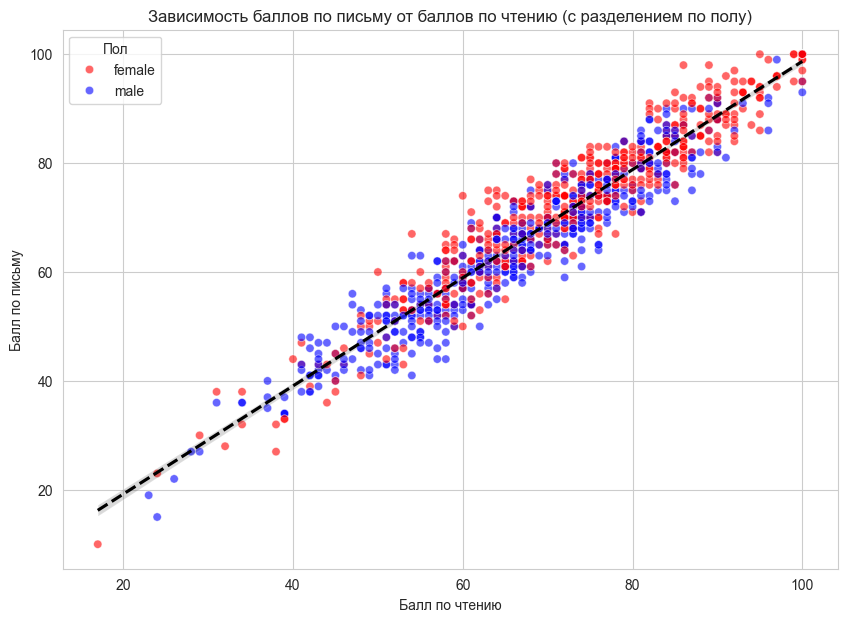

In [16]:
# "Удачный" график:
plt.figure(figsize=(10,7))
sns.scatterplot(x='reading_score', y='writing_score', hue='gender', data=df, alpha=0.6, palette={'male':'blue', 'female':'red'}) # alpha для прозрачности, hue для разделения по полу
# Добавим линию регрессии
sns.regplot(x='reading_score', y='writing_score', data=df, scatter=False, color='black', line_kws={'linestyle':'--'})
plt.title('Зависимость баллов по письму от баллов по чтению (с разделением по полу)')
plt.xlabel('Балл по чтению')
plt.ylabel('Балл по письму')
plt.legend(title='Пол')
plt.show()

In [17]:
correlation = df['reading_score'].corr(df['writing_score'])
print(f"Коэффициент корреляции Пирсона между баллами по чтению и письму: {correlation:.2f}")

Коэффициент корреляции Пирсона между баллами по чтению и письму: 0.95


Наблюдается сильная положительная корреляция между баллами по чтению и письму (коэффициент корреляции ~ 0.95). Это означает, что студенты, хорошо успевающие по чтению, как правило, хорошо успевают и по письму. Точки на графике в основном сгруппированы вдоль диагонали, идущей из левого нижнего угла в правый верхний. Линия регрессии подтверждает эту тенденцию. Разделение по полу показывает, что, например, девушки в среднем набирают чуть больше по письму при одинаковых баллах по чтению, или нет явных различий – смотри на свой график

### Шаг 4: Распределение студентов по уровню образования родителей

**Обоснование выбора графика (Data-to-Viz):**
Мы хотим показать доли (состав) одной категориальной переменной (parental_level_of_education). Для этой задачи подходит круговая диаграмма (pie chart), если категорий не слишком много (до 5-7), или столбчатая диаграмма (bar chart). Выберем круговую диаграмму, но с осторожностью. Типичная ошибка: использование pie chart для слишком большого числа категорий или для сравнения, а не для показа долей.

**"Неудачный" график (пример):** Если бы у нас было 10+ категорий образования, круговая диаграмма была бы нечитаемой. Или если бы мы пытались на ней сравнить средние баллы, а не доли.

In [18]:
# Подсчет количества студентов для каждого уровня образования родителей
parental_education_counts = df['parental_level_of_education'].value_counts()

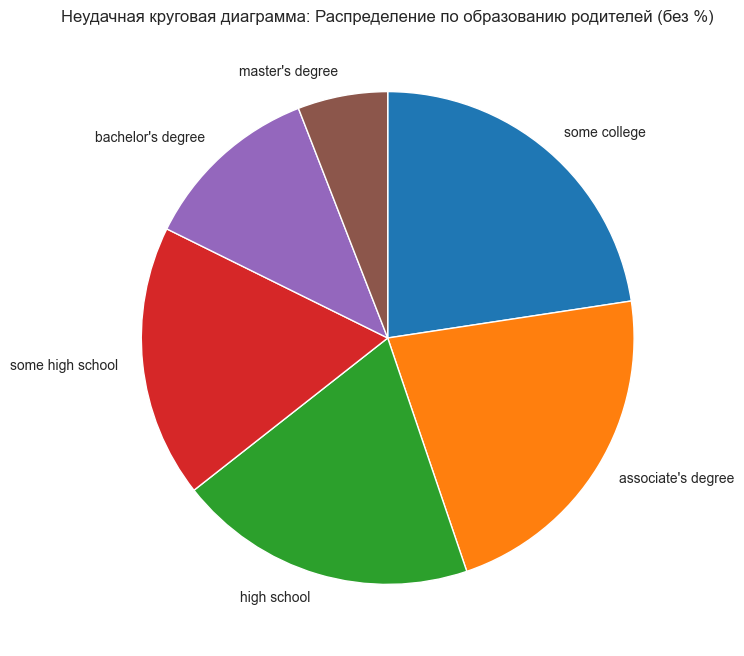

In [19]:
# "Неудачный" вариант: (для этого датасета сложно сделать совсем плохой pie, но можно без процентов или с неудачными цветами)
# Допустим, мы бы хотели показать еще какую-то малочисленную категорию
# или если бы категории были не отсортированы, что затруднило бы чтение
# Давайте сделаем pie chart без процентных меток, что менее информативно
plt.figure(figsize=(8, 8))
plt.pie(parental_education_counts, labels=parental_education_counts.index, startangle=90, counterclock=False)
plt.title('Неудачная круговая диаграмма: Распределение по образованию родителей (без %)')
plt.show()
# Отсутствие процентных значений затрудняет точное восприятие долей.

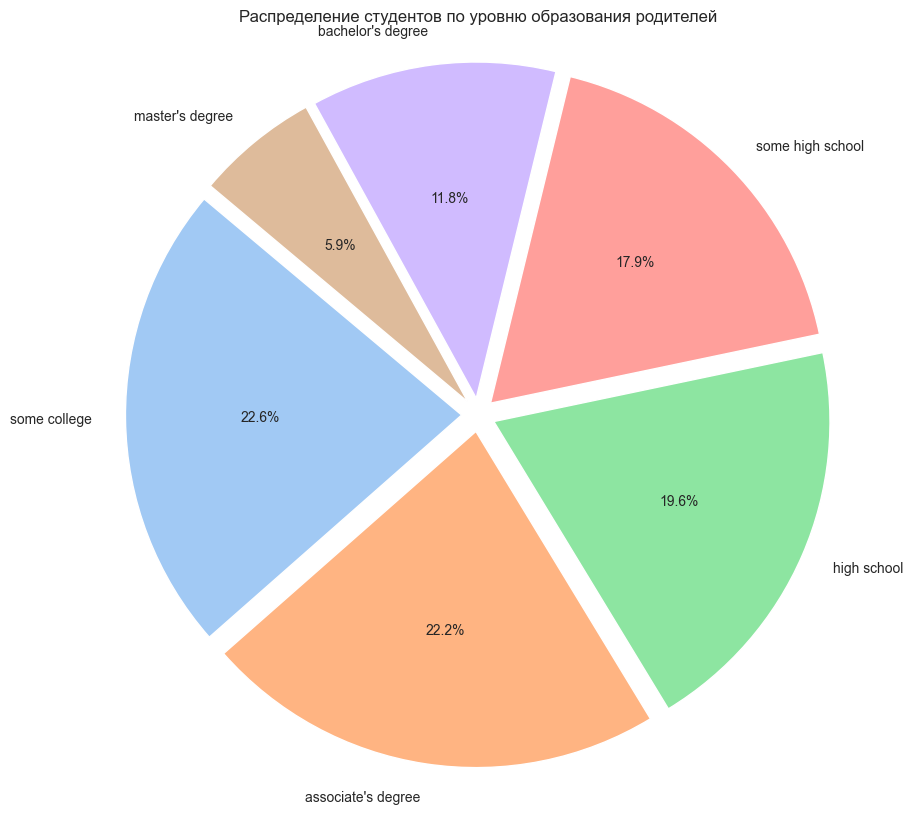

In [20]:
# "Удачный" график:
plt.figure(figsize=(10, 10))
# Используем autopct для отображения процентов, explode для выделения наибольшего сегмента (опционально)
# Сортируем значения для лучшего визуального восприятия (хотя для pie это не всегда критично)
sorted_counts = parental_education_counts.sort_values(ascending=False)
explode_values = [0.05] * len(sorted_counts) # небольшой отступ для всех сегментов или [0.1, 0, 0, 0, 0, 0] для первого

plt.pie(sorted_counts,
        labels=sorted_counts.index,
        autopct='%1.1f%%', # Формат отображения процентов
        startangle=140,      # Начальный угол
        colors=sns.color_palette('pastel'),
        explode=explode_values)
plt.title('Распределение студентов по уровню образования родителей')
plt.axis('equal') # Делает круг круглым
plt.show()

Наибольшая доля студентов имеет родителей с уровнем образования "some college" (22.6%). Далее следуют "associate's degree" (22.2%) и так далее. Наименьшая доля приходится на родителей с "master's degree" (5.9%). Это дает представление о социально-образовательном фоне учащихся.

### Шаг 5: Сравнение распределения баллов по математике в зависимости от типа обеда и пола

**Обоснование выбора графика (Data-to-Viz):**
Мы хотим сравнить распределение числовой переменной (math_score) по двум категориальным переменным (lunch и gender). Для этой задачи хорошо подходят ящичковые диаграммы (box plots) или скрипичные диаграммы (violin plots). Скрипичные диаграммы сочетают в себе черты ящичковой диаграммы и графика плотности, что дает более полное представление о форме распределения.

**"Неудачный" график (пример):** Попытка использовать несколько гистограмм на одном поле без должного разделения может быть запутанной. Или использование bar chart для средних, что скроет детали распределения (разброс, выбросы).

C:\Users\mesou\AppData\Local\Temp\ipykernel_6528\790908779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='math_score', data=df, palette="PRGn")


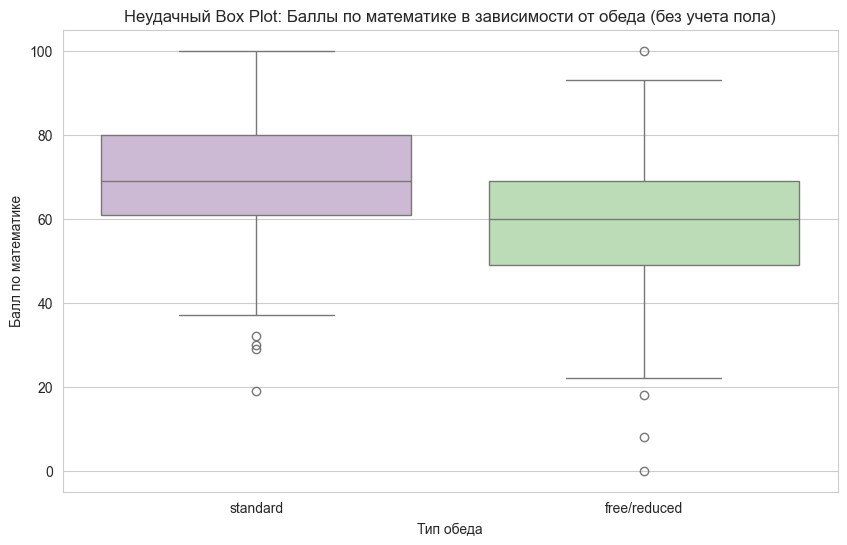

In [21]:
# "Неудачный" вариант: (можно, например, наложить boxplot'ы так, что они будут плохо читаться, или не использовать hue)
plt.figure(figsize=(10,6))
sns.boxplot(x='lunch', y='math_score', data=df, palette="PRGn")
plt.title('Неудачный Box Plot: Баллы по математике в зависимости от обеда (без учета пола)')
plt.xlabel('Тип обеда')
plt.ylabel('Балл по математике')
plt.show()
# Этот график не позволяет увидеть, есть ли различия внутри групп "обеда" в зависимости от пола.

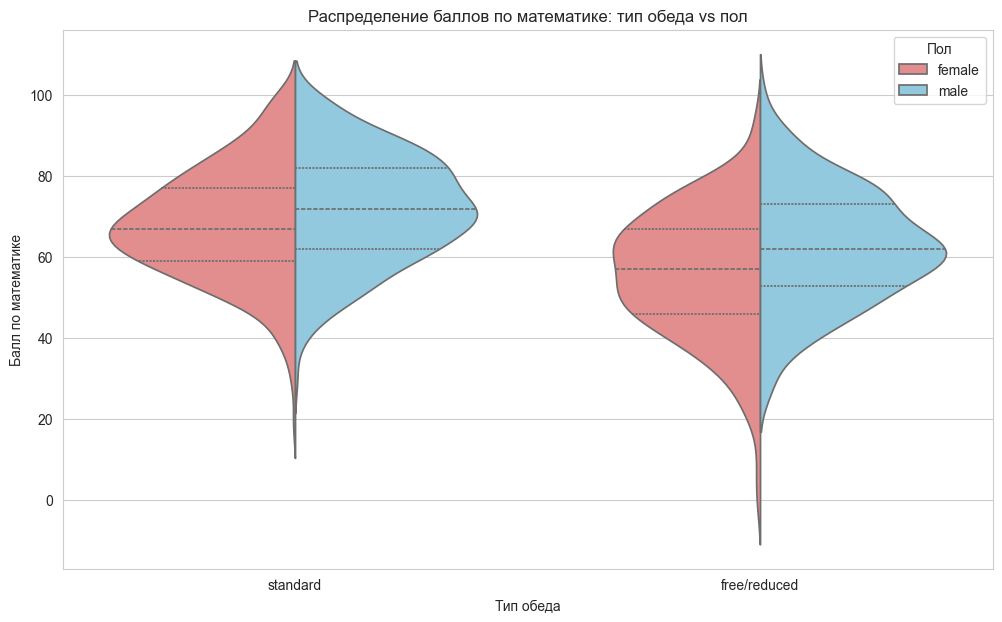

In [22]:
# "Удачный" график:
plt.figure(figsize=(12, 7))
sns.violinplot(x='lunch', y='math_score', hue='gender', data=df, split=True, palette={'male':'skyblue', 'female':'lightcoral'}, inner="quartile")
# inner="quartile" добавит линии для квартилей внутри скрипок
# split=True позволяет сравнить две категории 'hue' на одной "скрипке"
plt.title('Распределение баллов по математике: тип обеда vs пол')
plt.xlabel('Тип обеда')
plt.ylabel('Балл по математике')
plt.legend(title='Пол')
plt.show()

Скрипичные диаграммы показывают, что студенты, получающие стандартный обед (standard), в среднем имеют более высокие баллы по математике по сравнению с теми, кто получает льготный/бесплатный обед (free/reduced). Эта тенденция наблюдается как у юношей, так и у девушек.
Также можно отметить, что [например, у юношей разброс баллов выше в группе со стандартным обедом, или медианные значения для юношей и девушек различаются в зависимости от типа обеда – смотри на свой график]. Форма "скрипок" указывает на более плотное скопление результатов в центральной части для стандартного обеда, или наличие "хвостов" с низкими результатами для льготного

Итоговые выводы:

1. Подготовка решает: Студенты, прошедшие курс подготовки к тестам, демонстрируют значительно лучшие результаты по всем предметам. Это ключевой фактор успеха.

2. Сильная связь между языковыми навыками: Существует высокая положительная корреляция между баллами по чтению и письму. Развитие одного навыка, вероятно, способствует развитию другого.

3. Влияние социально-экономических факторов: Тип обеда, который может косвенно указывать на социально-экономическое положение семьи, заметно коррелирует с успеваемостью по математике (и, вероятно, другим предметам). Студенты со стандартным обедом показывают лучшие результаты.

4. Образование родителей: (Основываясь на Шаге 4, можно сделать вывод о преобладающем уровне образования родительской аудитории, но прямой вывод о влиянии на баллы требует отдельного графика, например, boxplot баллов по уровню образования родителей). Датасет показывает разнообразие уровней образования родителей.

5. Гендерные особенности (если есть): (Основываясь на Шаге 3 и 5) Можно отметить, есть ли систематические различия в успеваемости между юношами и девушками по разным предметам или в разных условиях (например, девушки могут показывать чуть лучшие результаты по письму при тех же баллах по чтению).

6. Общее распределение баллов: Баллы по математике (и, вероятно, другим предметам) распределены достаточно широко, что указывает на разнородный уровень подготовки студентов.